In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("./mushrooms.csv")
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

<AxesSubplot:xlabel='class', ylabel='count'>

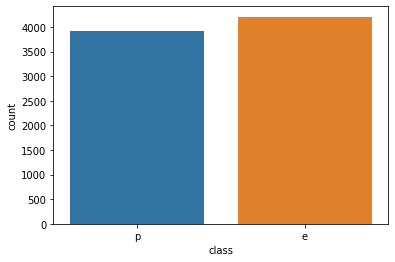

In [4]:
sns.countplot(x='class', data=df)

In [6]:
df.describe().T

,count,unique,top,freq
class,8124,2,e,4208
cap-shape,8124,6,x,3656
cap-surface,8124,4,y,3244
cap-color,8124,10,n,2284
bruises,8124,2,f,4748
odor,8124,9,n,3528
gill-attachment,8124,2,f,7914
gill-spacing,8124,2,c,6812
gill-size,8124,2,b,5612
gill-color,8124,12,b,1728


In [7]:
feat_unique = df.describe().T.reset_index().sort_values(by='unique')

In [8]:
feat_unique

,index,count,unique,top,freq
16,veil-type,8124,1,p,8124
0,class,8124,2,e,4208
4,bruises,8124,2,f,4748
6,gill-attachment,8124,2,f,7914
7,gill-spacing,8124,2,c,6812
8,gill-size,8124,2,b,5612
10,stalk-shape,8124,2,t,4608
18,ring-number,8124,3,o,7488
2,cap-surface,8124,4,y,3244
17,veil-color,8124,4,w,7924


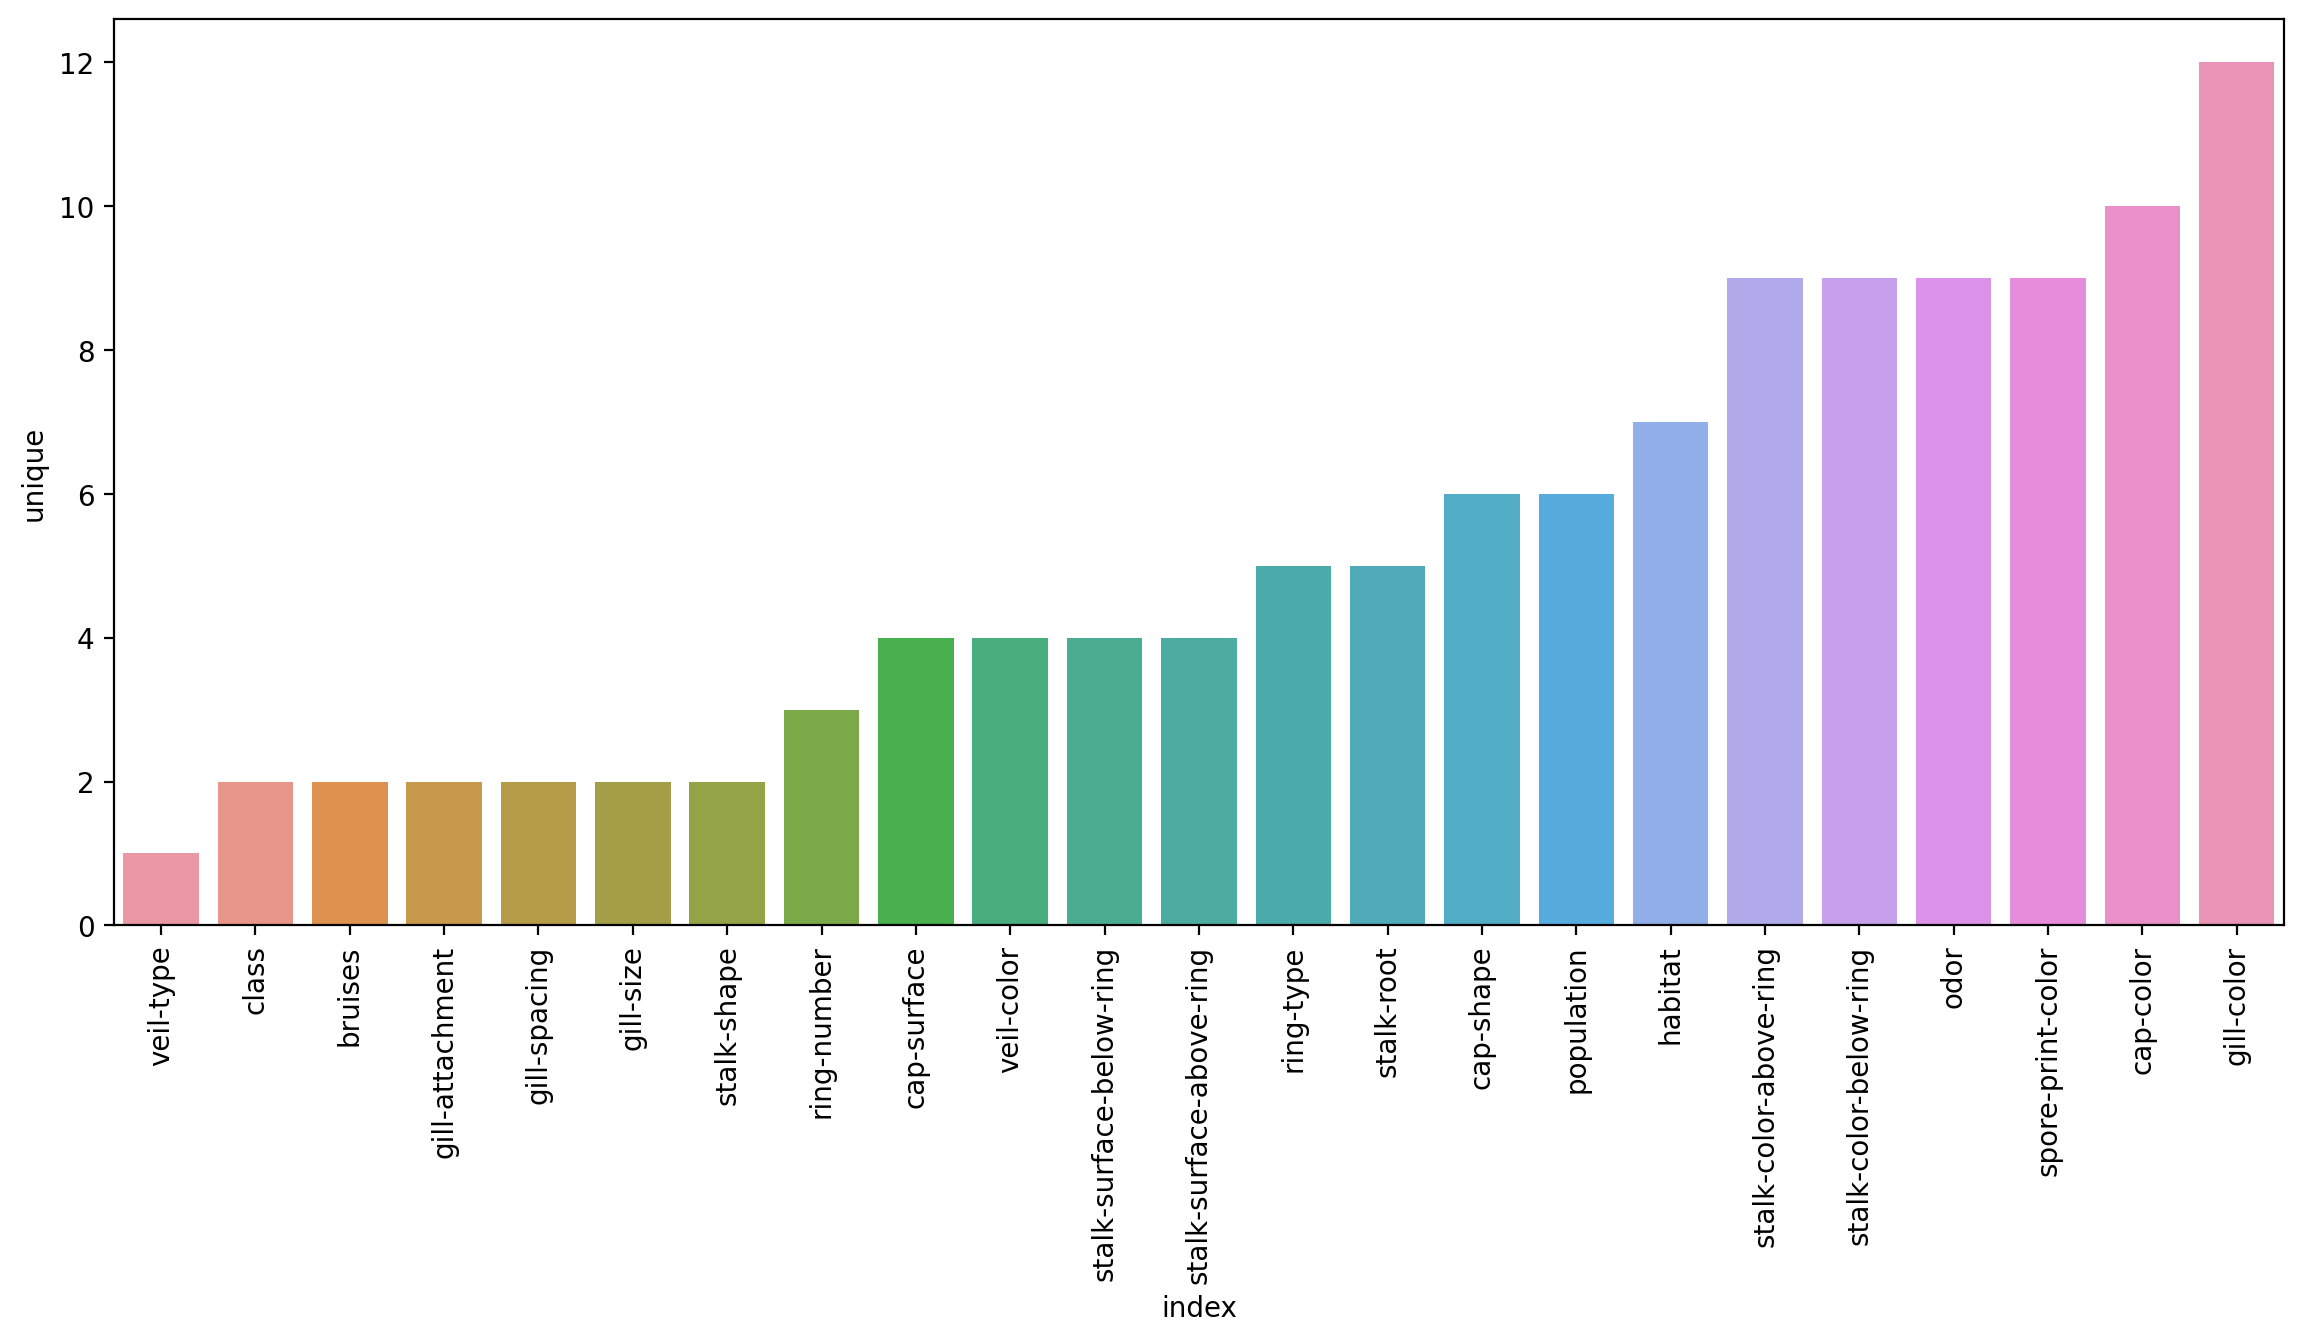

In [11]:
plt.figure(figsize=(14,6), dpi=200)
sns.barplot(x='index', y='unique', data=feat_unique)
plt.xticks(rotation=90);

In [12]:
X = df.drop(['class'], axis=1)
y = df['class']

In [13]:
X = pd.get_dummies(X, drop_first=True)

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=101)

In [15]:
from sklearn.ensemble import AdaBoostClassifier

In [16]:
model = AdaBoostClassifier(n_estimators=1)

In [17]:
model.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=1)

In [18]:
preds = model.predict(X_test)

In [19]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [20]:
accuracy_score(y_test, preds)

0.8777686628383922

In [21]:
confusion_matrix(y_test, preds)

array([[529, 126],
       [ 23, 541]], dtype=int64)

In [22]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           e       0.96      0.81      0.88       655
           p       0.81      0.96      0.88       564

    accuracy                           0.88      1219
   macro avg       0.88      0.88      0.88      1219
weighted avg       0.89      0.88      0.88      1219



In [23]:
model.feature_importances_

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [24]:
model.feature_importances_.argmax()

22

In [25]:
X.columns[model.feature_importances_.argmax()]

'odor_n'

<AxesSubplot:xlabel='odor', ylabel='count'>

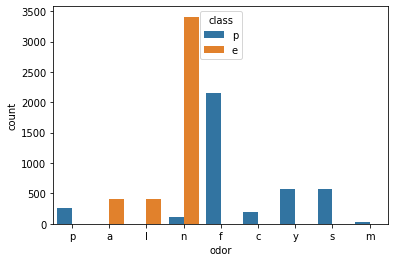

In [26]:
sns.countplot(x='odor', data=df, hue='class')

In [27]:
error_rates = []

for n in range(1,96):
    model = AdaBoostClassifier(n_estimators=n)
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    error_rates.append(1 - accuracy_score(y_test, preds))

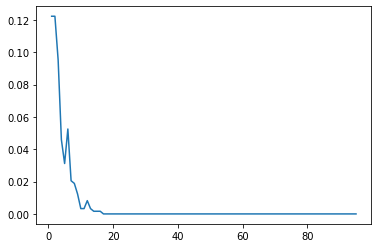

In [28]:
plt.plot(range(1,96), error_rates)

In [29]:
feats = pd.DataFrame(index=X.columns, data=model.feature_importances_, columns=['importance'])
feats

,importance
cap-shape_c,0.000000
cap-shape_f,0.000000
cap-shape_k,0.000000
cap-shape_s,0.000000
cap-shape_x,0.000000
...,...
habitat_l,0.000000
habitat_m,0.000000
habitat_p,0.000000
habitat_u,0.000000


In [30]:
imp_feats = feats[feats['importance'] > 0]

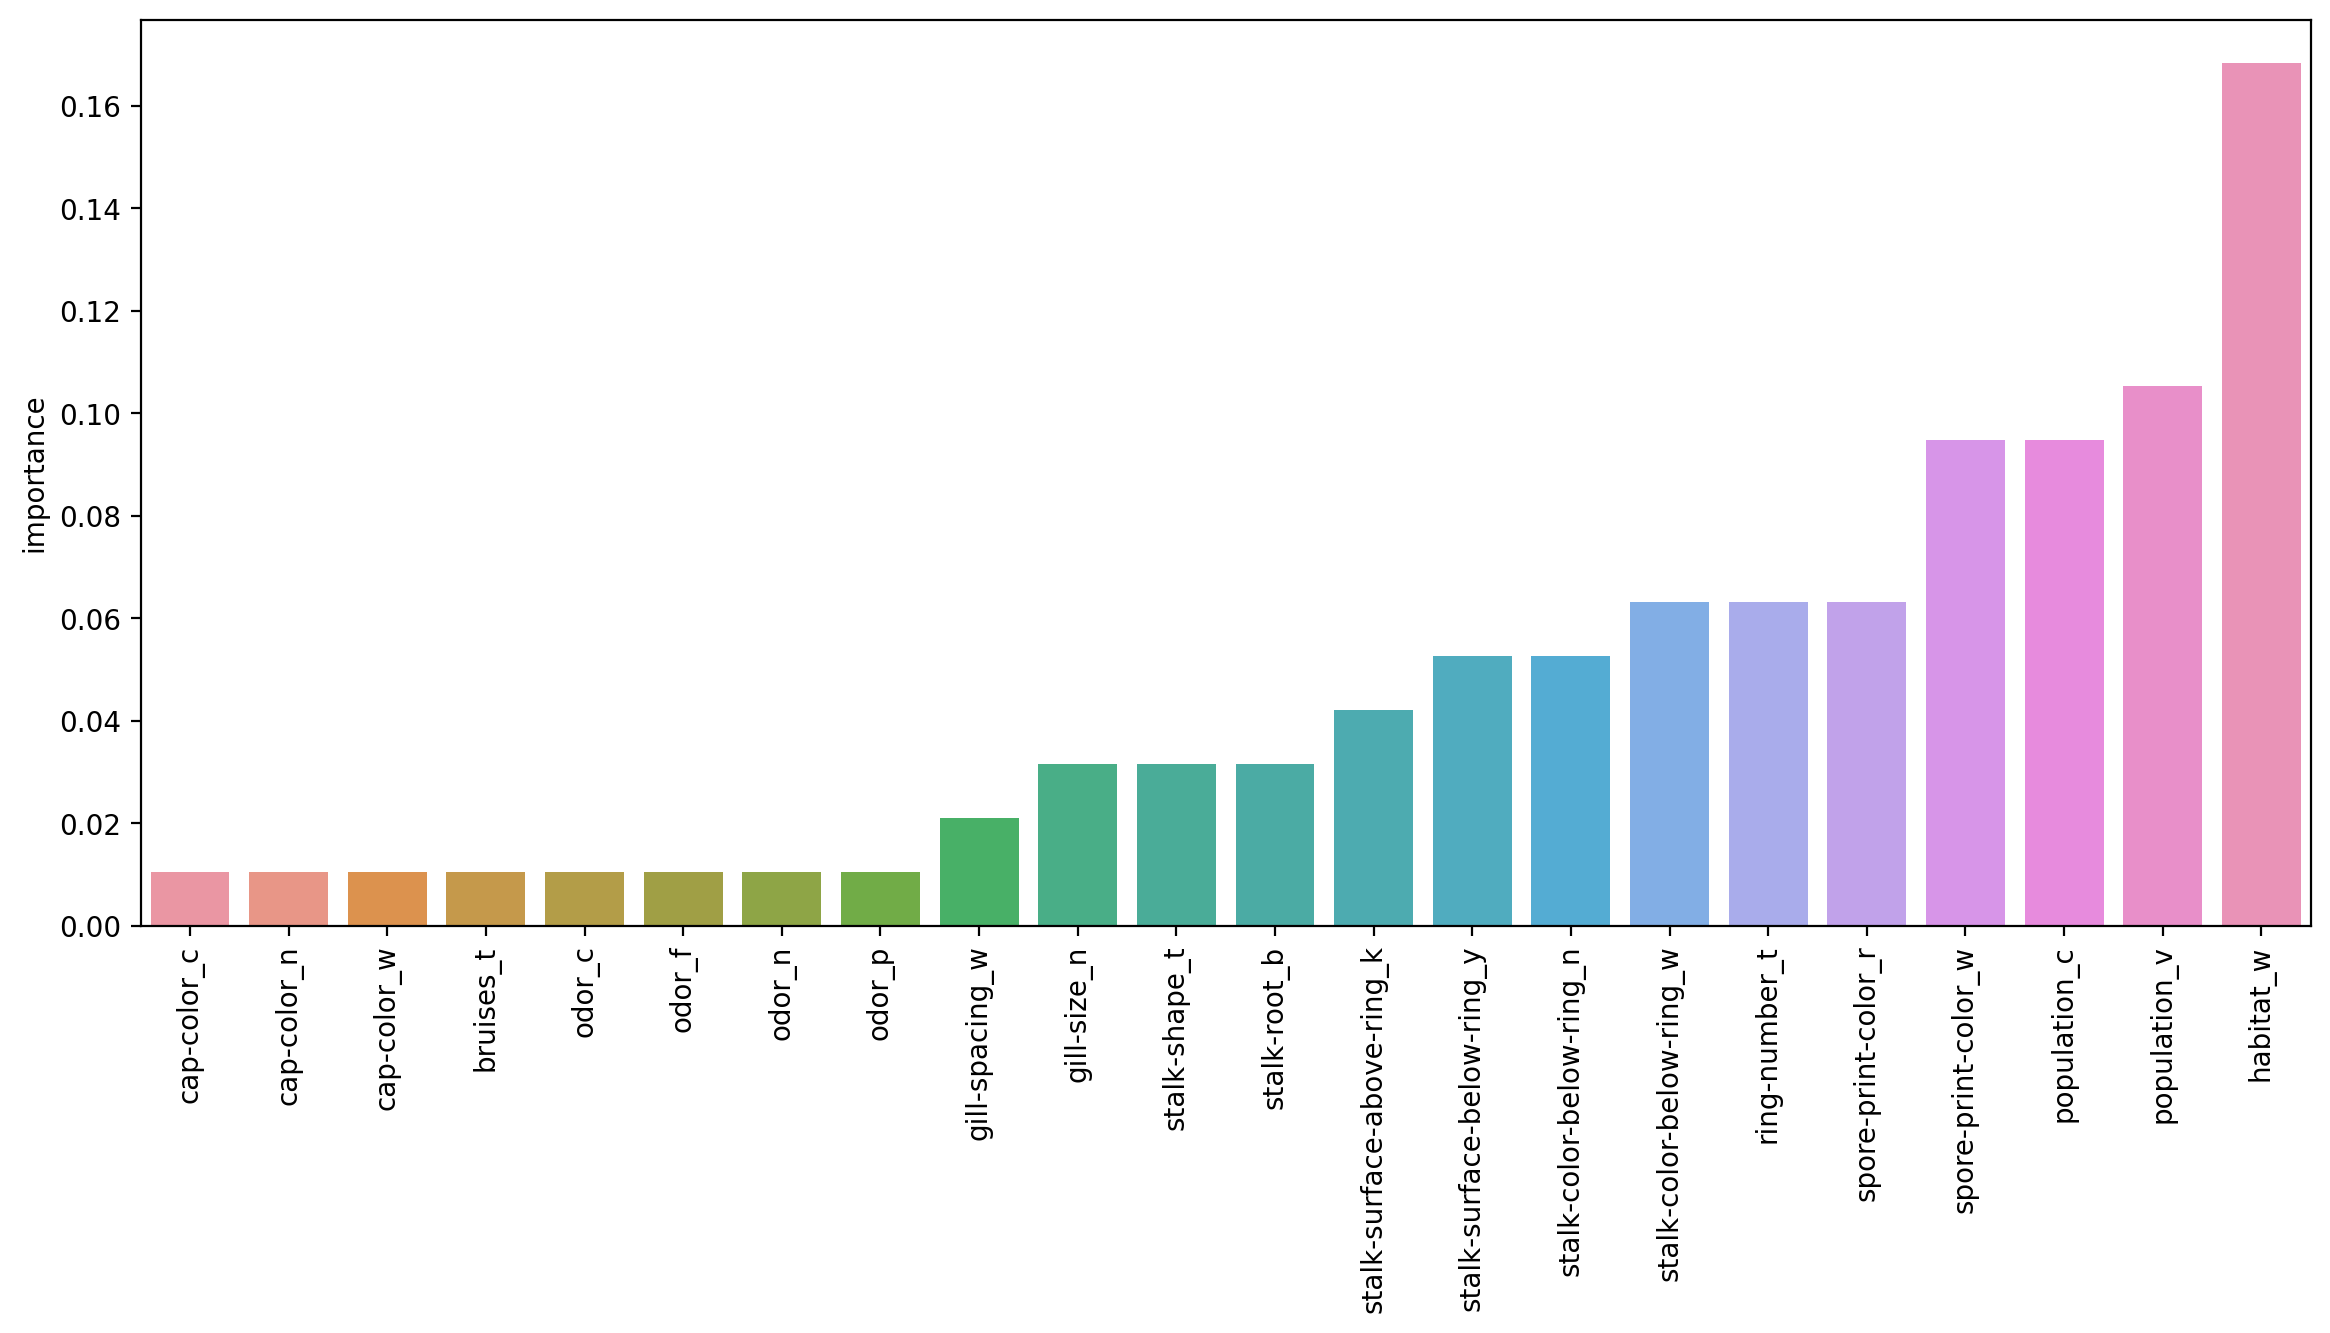

In [33]:
plt.figure(figsize=(14,6), dpi=200)
sns.barplot(x=imp_feats.index, y='importance', data=imp_feats.sort_values(by='importance'))
plt.xticks(rotation=90);